In [20]:
import numpy as np
import mne

In [21]:
# Load the EEG data from the EDF file
raw = mne.io.read_raw_edf('data/sub-01/ses-01/ieeg/sub-01_ses-01_task-verbalWM_run-01_ieeg.edf', preload=True)

print(raw.info)

Extracting EDF parameters from /home/pappol/Scrivania/uni/medical/EEGNet/data/sub-01/ses-01/ieeg/sub-01_ses-01_task-verbalWM_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 799999  =      0.000 ...   400.000 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: mAHL1, mAHL2, mAHL3, mAHL4, mAHL5, mAHL6, mAHL7, mAHL8, mAL1, ...
 chs: 48 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2023-09-13 10:27:08 UTC
 nchan: 48
 projs: []
 sfreq: 2000.0 Hz
 subject_info: 1 item (dict)
>


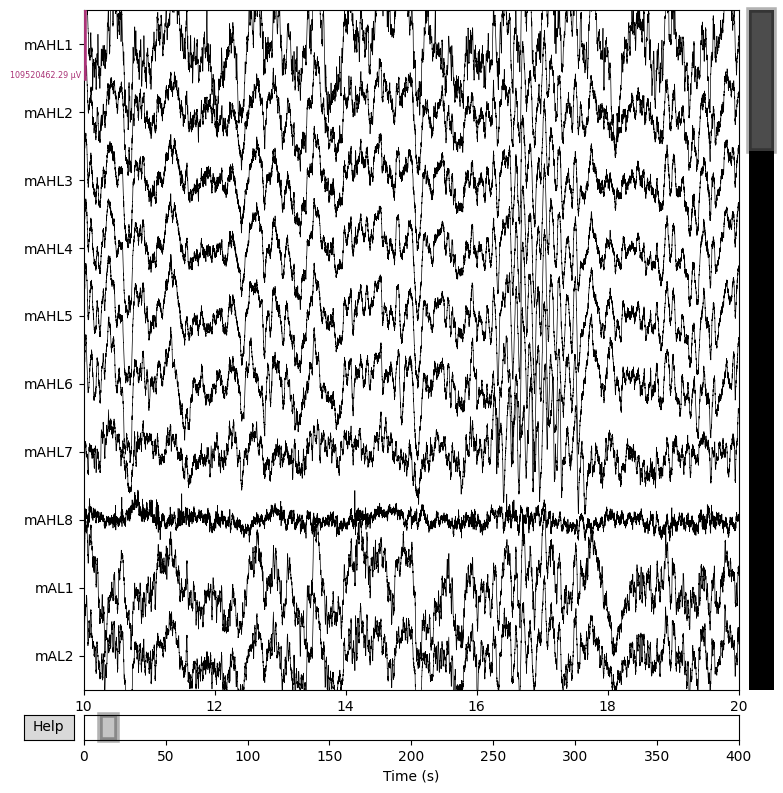

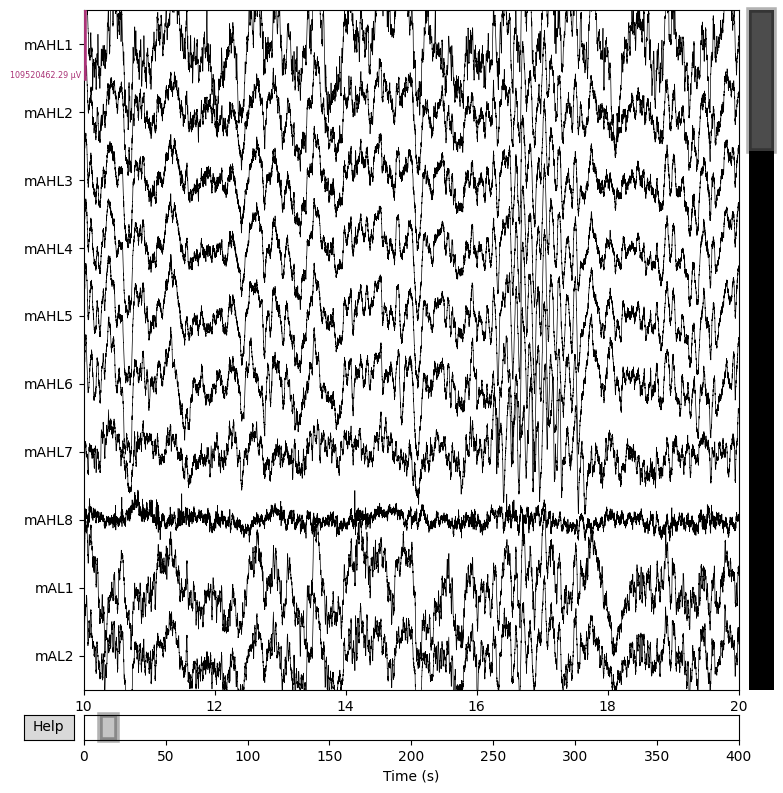

In [22]:
# Plot a snippet of the EEG data
raw.plot(start=10, duration=10, n_channels=10, scalings='auto', show=True)

Effective window size : 1.024 (s)


/tmp/ipykernel_16559/2286041500.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")


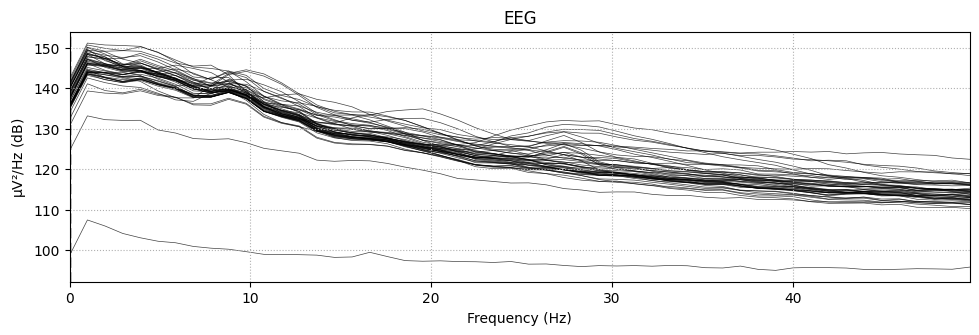

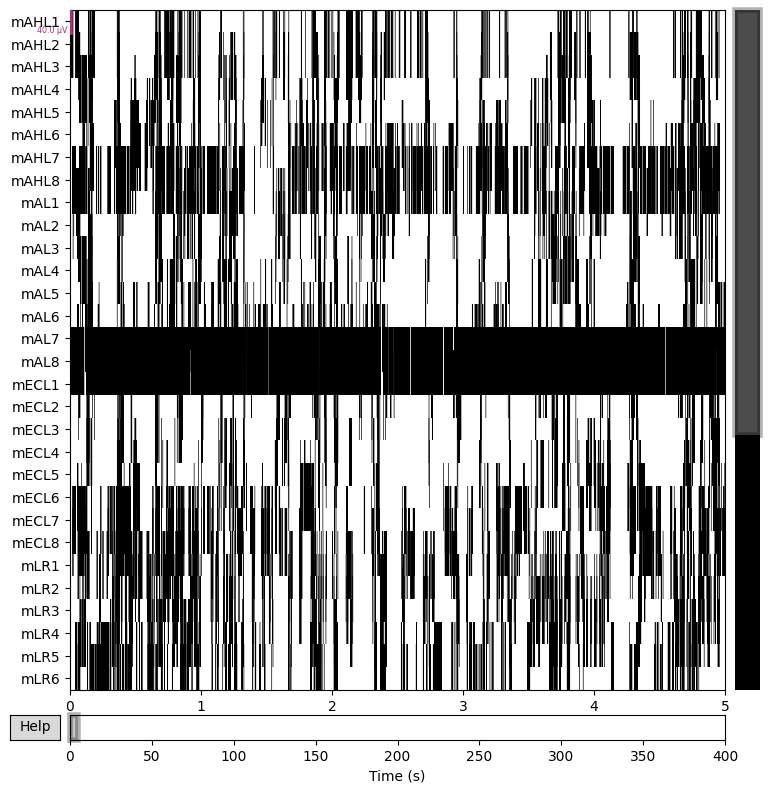

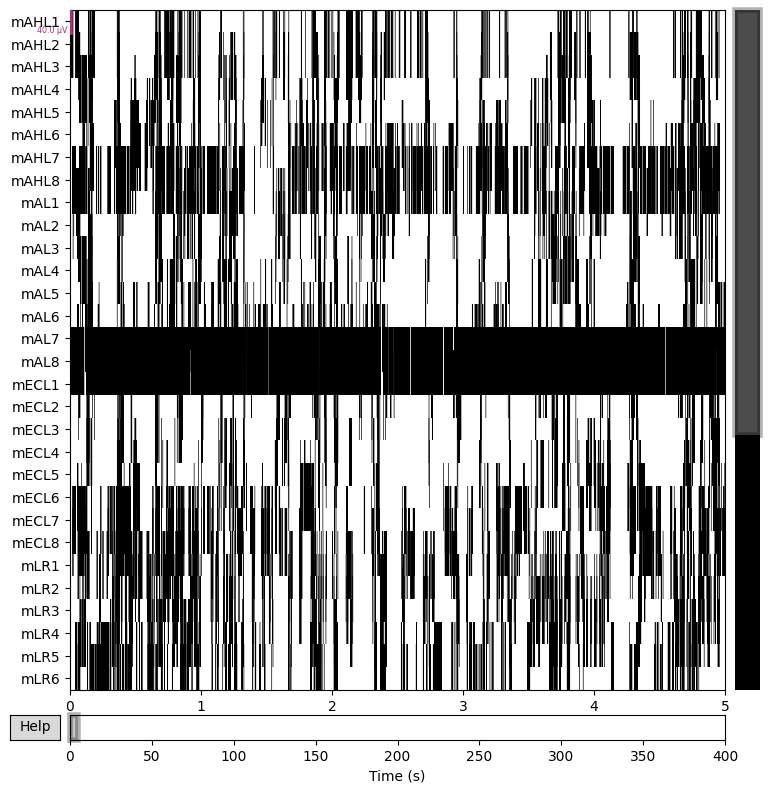

In [23]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=30)


In [27]:
#apply high pass filter on the data
raw.filter(l_freq=1, h_freq=None, fir_design='firwin', skip_by_annotation='edge')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6601 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<RawEDF | sub-01_ses-01_task-verbalWM_run-01_ieeg.edf, 48 x 800000 (400.0 s), ~293.0 MB, data loaded>

In [31]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw)


Fitting ICA to data using 48 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 10.7s.


Method,fastica
Fit,28 iterations on raw data (800000 samples)
ICA components,15
Available PCA components,48
Channel types,eeg
ICA components marked for exclusion,—


In [39]:
# details on how we picked these are omitted here
reject = dict(eeg=180e-6) # this is in volts, not scalp EEG volts


ica.plot_properties(raw, picks=ica.exclude, psd_args={'fmax': 35.},)

AttributeError: 'ICA' object has no attribute 'detect_artifacts'